# Univariate

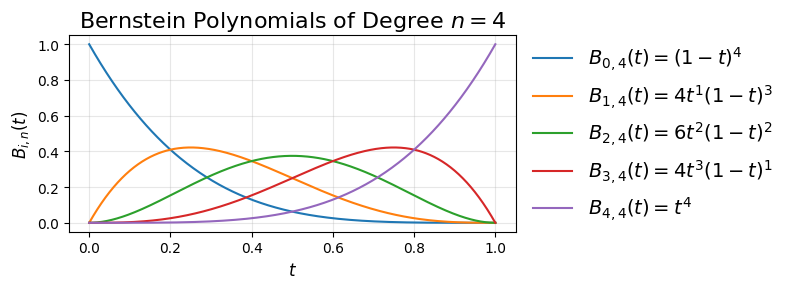

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb  # For binomial coefficient

# Define Bernstein polynomial
def bernstein(n, k, x):
    return comb(n, k) * (x ** k) * ((1 - x) ** (n - k))

# Parameters
n = 4  # Degree of the Bernstein polynomial
x = np.linspace(0, 1, 500)  # x values for plotting

# Plot Bernstein polynomials for k = 0, 1, ..., n
plt.figure(figsize=(8, 3))  # Increase figure size to accommodate the legend
for k in range(n + 1):
    # Add the expression for B_{n,k}(x) in the legend
    if k == 0:
        expression = rf"$B_{{{k},{n}}}(t) = (1-t)^{n}$"
    elif k == n:
        expression = rf"$B_{{{k},{n}}}(t) = t^{n}$"
    else:
        expression = rf"$B_{{{k},{n}}}(t) = {int(comb(n, k))} t^{{{k}}} (1-t)^{{{n-k}}}$"
    plt.plot(x, bernstein(n, k, x), label=expression)

# Add legend and labels
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14, frameon=False)
plt.title(fr"Bernstein Polynomials of Degree $n={n}$", fontsize=16)
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$B_{i,n}(t)$", fontsize=12)

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout for space on the right
plt.grid(alpha=0.3)

# Display plot

plt.tight_layout()
plt.savefig(dpi=1000, fname="bernstein_poly.png")
plt.show()


# Bivariate triangle

<Figure size 640x480 with 0 Axes>

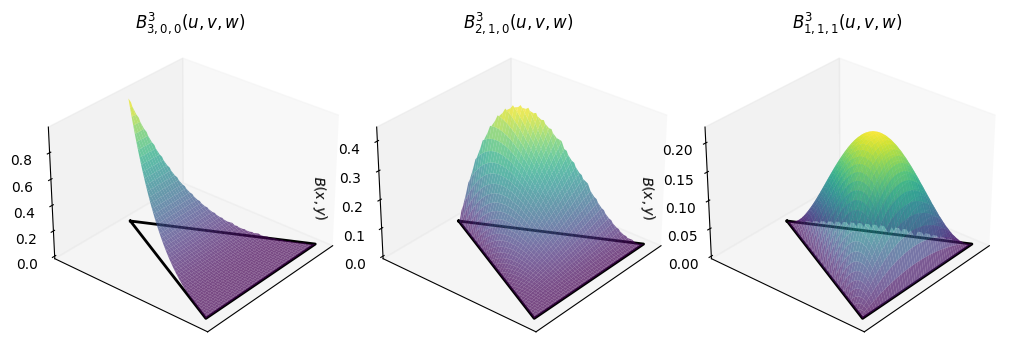

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Step 1: Bernstein basis function
def bernstein_basis(n, i, j, u, v):
    k = n - i - j  # k = n - (i + j)
    if k < 0:  # Outside the triangle, basis is 0
        return 0
    coeff = factorial(n) / (factorial(i) * factorial(j) * factorial(k))
    w = 1 - u - v
    return coeff * (u ** i) * (v ** j) * (w ** k)

# Step 2: Converter functions
def barycentric_cartesian_converter(p1, p2, p3):
    def determinant(a, b):
        return a[0] * b[1] - a[1] * b[0]

    detT = determinant((p2[0] - p1[0], p2[1] - p1[1]), (p3[0] - p1[0], p3[1] - p1[1]))

    def cartesian_to_barycentric(x, y):
        v = determinant((x - p1[0], y - p1[1]), (p3[0] - p1[0], p3[1] - p1[1])) / detT
        w = determinant((p2[0] - p1[0], p2[1] - p1[1]), (x - p1[0], y - p1[1])) / detT
        u = 1 - v - w
        return (u, v, w)

    def barycentric_to_cartesian(u, v, w):
        x = u * p1[0] + v * p2[0] + w * p3[0]
        y = u * p1[1] + v * p2[1] + w * p3[1]
        return (x, y)

    return cartesian_to_barycentric, barycentric_to_cartesian

# Step 3: Define the triangle and Bernstein evaluation
p1 = (0.5, 1)
p2 = (1, 0)
p3 = (0, 0)

cartesian_to_barycentric, barycentric_to_cartesian = barycentric_cartesian_converter(p1, p2, p3)

# Grid over the triangle in Cartesian space
num_points = 100
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)+np.nan

def plotter(ax, i, j, n):
    # Evaluate Bernstein polynomial for points within the triangle
    for ix in range(X.shape[0]):
        for iy in range(X.shape[1]):
            x_val, y_val = X[ix, iy], Y[ix, iy]
            bary_coords = cartesian_to_barycentric(x_val, y_val)
            u, v, w = bary_coords
            if u >= 0 and v >= 0 and w >= 0:  # Point lies inside the triangle
                Z[ix, iy] = bernstein_basis(n, i, j, u, v)

    # Create surface plot
    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.7)

    # Overlay the new triangular domain
    triangle = np.array([p1, p2, p3, p1])  # New triangle vertices
    ax.plot(triangle[:, 0], triangle[:, 1], zs=0, color="black", linewidth=2)


    # Set labels and title
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$B(x, y)$")
    ax.set_title(f"$B_{{{i},{j},{n-i-j}}}^{{{n}}}(u, v, w)$")
    ax.view_init(30, 220)  # Adjust the view angle

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(False)

# Step 4: Plot the surface
fig = plt.figure()
fig, ax = plt.subplots(1,3,figsize=(10,5),subplot_kw=dict(projection='3d'))

plotter(ax[0], 3, 0, 3)
plotter(ax[1], 2, 1, 3)
plotter(ax[2], 1, 1, 3)

plt.tight_layout()
plt.savefig(dpi=1000, fname="bernstein_bivariate")
plt.show()